In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model

In [2]:
df = pd.read_csv("insurance_data.csv")
df

,age,bought_insurance
0,22,0
1,25,0
2,47,1
3,52,0
4,46,1
5,56,1
6,55,0
7,60,1
8,62,1
9,61,1


In [3]:
X=df[['age']].values
Y=df.bought_insurance.values

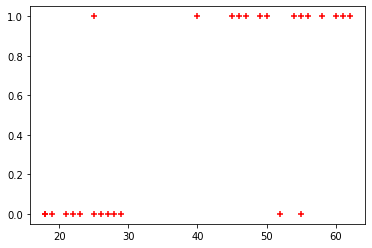

In [4]:
%matplotlib inline
plt.scatter(X,Y,color='red', marker='+')

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=10)

In [6]:
x_test

array([[60],
       [56],
       [19],
       [26],
       [28],
       [25]], dtype=int64)

In [7]:
model1 = linear_model.LinearRegression()
model1.fit(x_train, y_train)

LinearRegression()

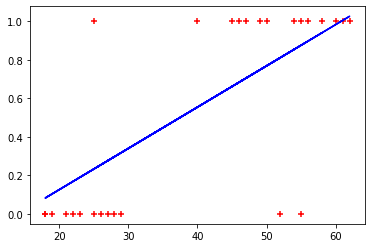

In [8]:
%matplotlib inline
plt.scatter(X,Y,color='red', marker='+')
plt.plot(X, model1.predict(X), color='blue')

In [9]:
model1.coef_

array([0.021429])

In [10]:
model1.intercept_

-0.30307867275883393

In [11]:
model1.score(x_test,y_test)

0.8285500761982448

In [12]:
model2 = linear_model.LogisticRegression()
model2.fit(x_train, y_train)

LogisticRegression()

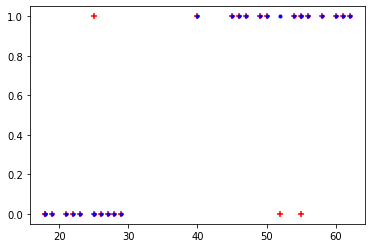

In [13]:
%matplotlib inline
plt.scatter(X,Y,color='red', marker='+')
plt.scatter(X, model2.predict(X), color='blue',marker='.')

In [14]:
x_test

array([[60],
       [56],
       [19],
       [26],
       [28],
       [25]], dtype=int64)

In [15]:
y_pred = model2.predict(x_test)
y_pred

array([1, 1, 0, 0, 0, 0], dtype=int64)

In [16]:
model2.score(x_test,y_test)

1.0

In [17]:
model2.predict_proba(x_test)

array([[0.07149888, 0.92850112],
       [0.10786116, 0.89213884],
       [0.88695589, 0.11304411],
       [0.78084024, 0.21915976],
       [0.73981614, 0.26018386],
       [0.79952814, 0.20047186]])

In [18]:
#model2.coef_ indicates value of m in y=m*x + b equation
model2.coef_

array([[0.11277822]])

In [19]:
model2.intercept_

array([-4.2028033])

<i><b style="color:lightgreen">Now Let's define the Sigmoid function using Python's math Library</b></i>

In [20]:
import math

In [21]:
def sigmoid(x):
    return 1/(1+math.exp(-x))

In [22]:
def predicted_value(age):
    x = 0.11277822*age -4.2028033
    return sigmoid(x)

In [23]:
def bought_insurance_yes_no(val):
    if(predicted_value(val)>=0.5):
        return 'YES'
    else:
        return "NO"

In [24]:
bought_insurance_yes_no(35)

'NO'

In [25]:
bought_insurance_yes_no(43)

'YES'